<a href="https://colab.research.google.com/github/lonespear/MA206/blob/main/minwook_jc_ai.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [30]:
library(tidyverse)
df <- read_csv('UFC_stats_final.csv') %>% filter(
    TD_Acc > 0 & TD_Acc < 100 & Sub_Avg > 0 & !is.na(Stance)
)

New names:
• `` -> `...1`
Rows: 1673 Columns: 15
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (2): fighter_name, Stance
dbl (13): ...1, Height, Weight, Reach, Birthyear, SLpM, Str_Acc, SApM, Str_D...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [31]:
df

...1,fighter_name,Height,Weight,Reach,Stance,Birthyear,SLpM,Str_Acc,SApM,Str_Def,TD_Avg,TD_Acc,TD_Def,Sub_Avg
<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,Shamil Abdurakhimov,75,235,76,Orthodox,1981,2.45,44,2.45,58,1.23,24,47,0.2
8,Mariya Agapova,66,125,68,Southpaw,1997,3.70,50,4.15,47,1.23,66,33,0.6
9,Jessica Aguilar,63,115,63,Orthodox,1982,4.93,50,7.19,53,0.94,25,50,0.2
13,Omari Akhmedov,72,185,73,Orthodox,1987,2.95,35,2.59,57,2.63,49,65,0.3
14,Yoshihiro Akiyama,70,170,75,Orthodox,1975,3.10,41,3.62,57,2.29,67,92,1.0
18,Amir Albazi,65,125,68,Orthodox,1993,4.06,40,3.15,58,2.28,75,66,0.8
20,Aleksandra Albu,62,115,63,Orthodox,1990,4.83,47,5.56,38,2.27,50,77,0.4
22,Ildemar Alcantara,74,185,78,Orthodox,1982,1.93,38,2.63,50,2.00,68,81,0.9
23,Iuri Alcantara,69,135,71,Southpaw,1980,2.72,45,2.79,49,1.44,62,60,0.8


In [32]:
df %>% head

...1,fighter_name,Height,Weight,Reach,Stance,Birthyear,SLpM,Str_Acc,SApM,Str_Def,TD_Avg,TD_Acc,TD_Def,Sub_Avg
<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,Shamil Abdurakhimov,75,235,76,Orthodox,1981,2.45,44,2.45,58,1.23,24,47,0.2
8,Mariya Agapova,66,125,68,Southpaw,1997,3.70,50,4.15,47,1.23,66,33,0.6
9,Jessica Aguilar,63,115,63,Orthodox,1982,4.93,50,7.19,53,0.94,25,50,0.2
13,Omari Akhmedov,72,185,73,Orthodox,1987,2.95,35,2.59,57,2.63,49,65,0.3
14,Yoshihiro Akiyama,70,170,75,Orthodox,1975,3.10,41,3.62,57,2.29,67,92,1.0
18,Amir Albazi,65,125,68,Orthodox,1993,4.06,40,3.15,58,2.28,75,66,0.8


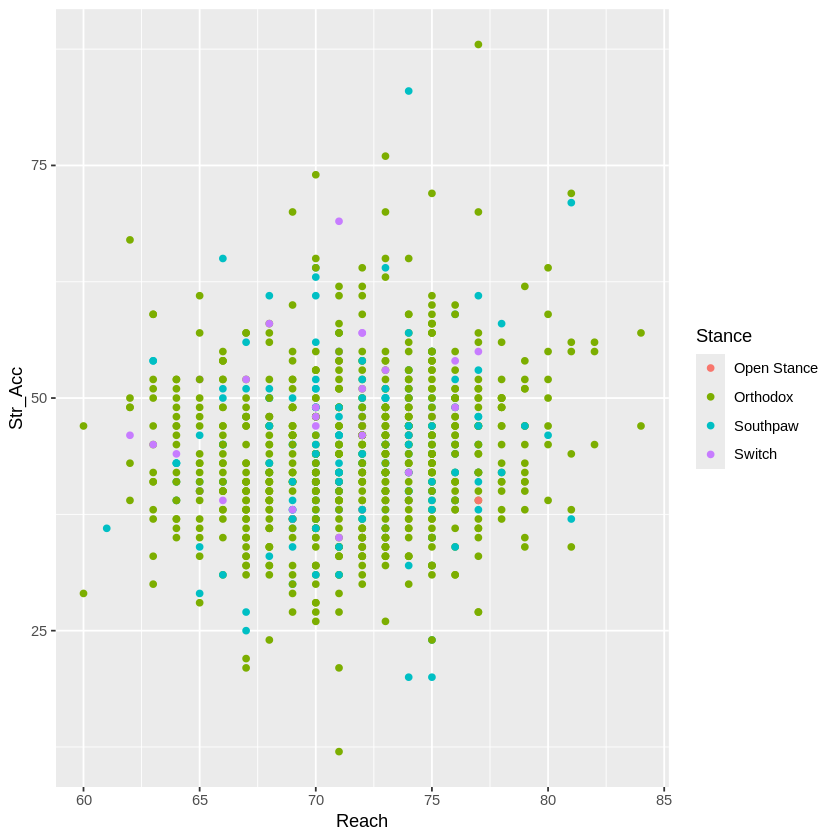

In [33]:
df %>% ggplot(aes(x=Reach, y=Str_Acc, color=Stance)) + geom_point()

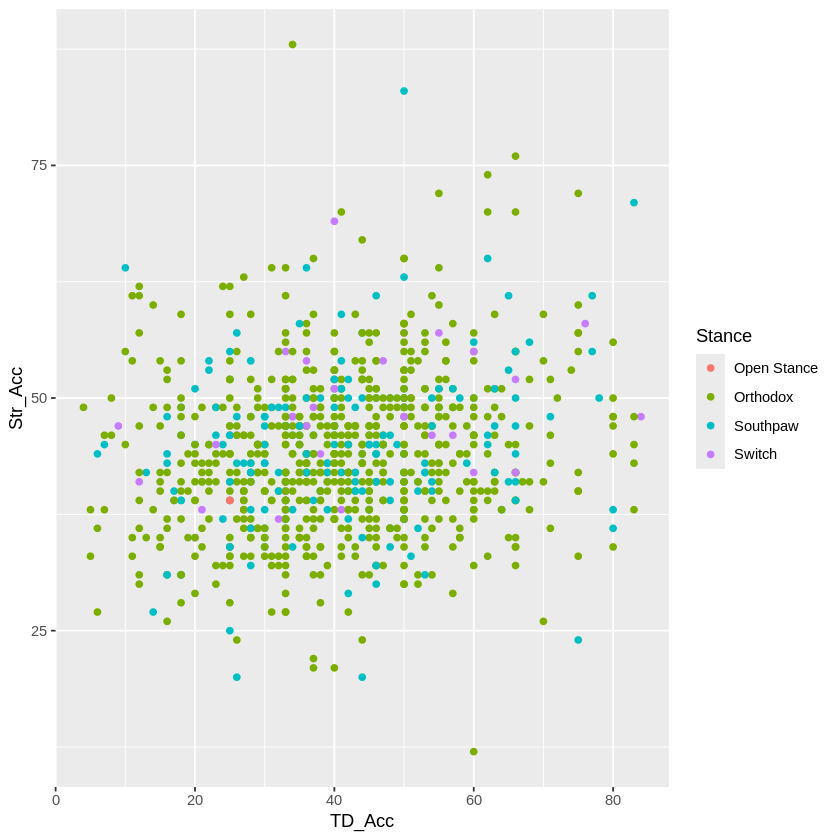

In [34]:
df %>% ggplot(aes(x=TD_Acc, y=Str_Acc, color=Stance)) + geom_point()

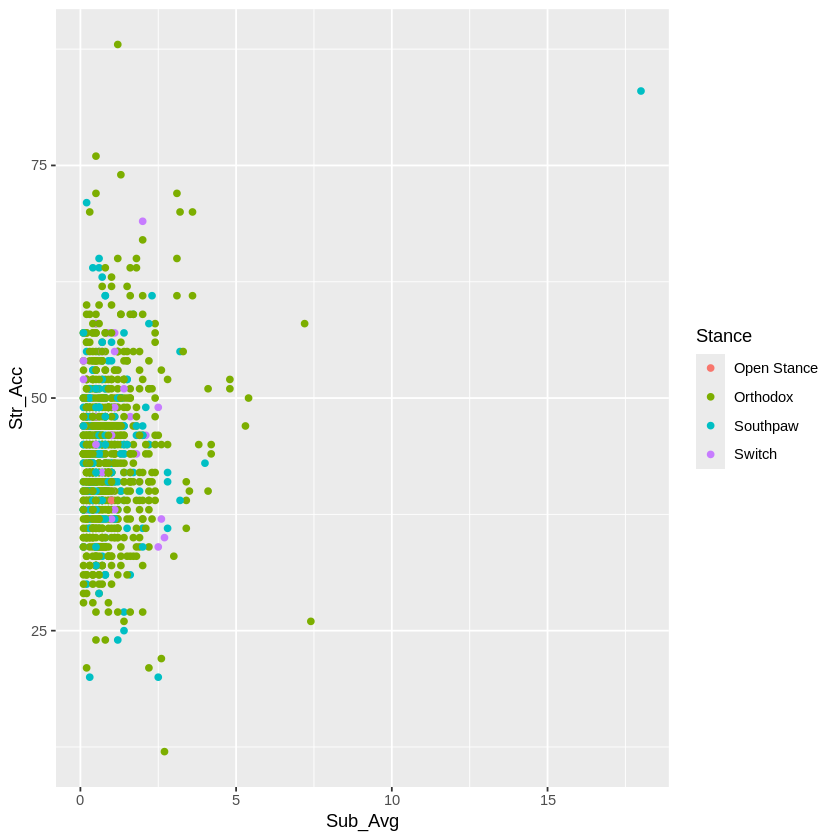

In [35]:
df %>% ggplot(aes(x=Sub_Avg, y=Str_Acc, color=Stance)) + geom_point()

In [36]:
summary(df$Sub_Avg)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.1000  0.4000  0.7000  0.9374  1.2000 18.0000 

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


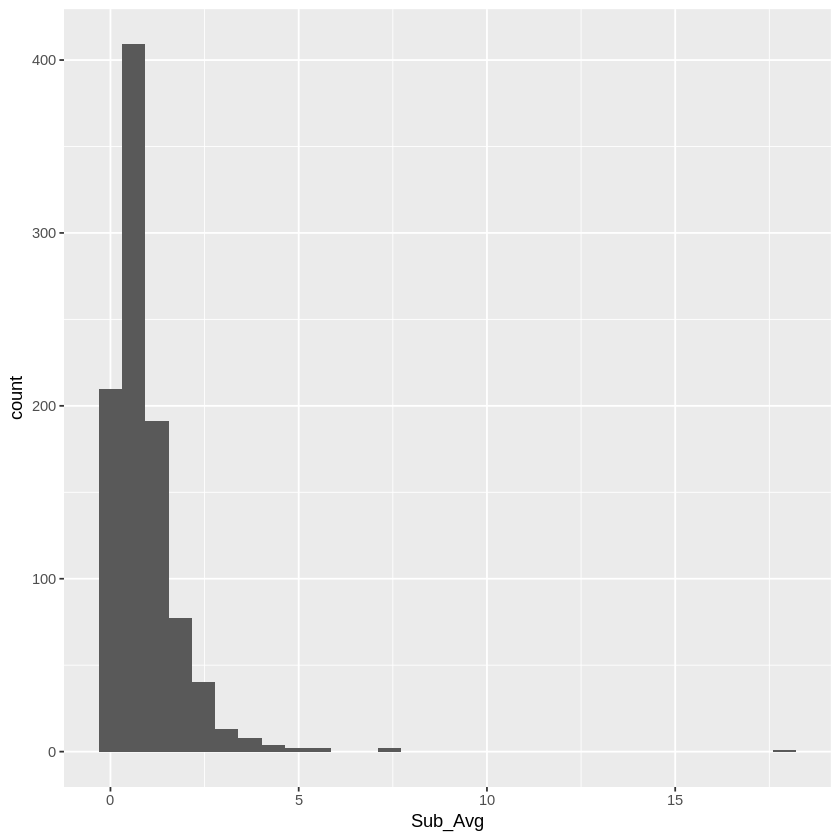

In [37]:
df %>% ggplot(aes(x=Sub_Avg)) + geom_histogram()

In [38]:
df %>% colnames

[1] "...1"         "fighter_name" "Height"       "Weight"       "Reach"       
 [6] "Stance"       "Birthyear"    "SLpM"         "Str_Acc"      "SApM"        
[11] "Str_Def"      "TD_Avg"       "TD_Acc"       "TD_Def"       "Sub_Avg"

In [39]:
model1 <- lm(Str_Acc ~ Reach, data=df)
summary(model1)


Call:
lm(formula = Str_Acc ~ Reach, data = df)

Residuals:
    Min      1Q  Median      3Q     Max 
-31.991  -5.206  -0.560   4.864  42.300 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 23.76817    4.71052   5.046 5.40e-07 ***
Reach        0.28483    0.06572   4.334 1.62e-05 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 8.329 on 957 degrees of freedom
Multiple R-squared:  0.01925,	Adjusted R-squared:  0.01822 
F-statistic: 18.78 on 1 and 957 DF,  p-value: 1.621e-05


In [40]:
model2 <- lm(Str_Acc ~ Reach + Stance, data=df)
summary(model2)


Call:
lm(formula = Str_Acc ~ Reach + Stance, data = df)

Residuals:
    Min      1Q  Median      3Q     Max 
-31.723  -5.272  -0.507   4.805  42.511 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)    16.33945    9.73144   1.679   0.0935 .  
Reach           0.29429    0.06573   4.477 8.47e-06 ***
StanceOrthodox  6.48904    8.32513   0.779   0.4359    
StanceSouthpaw  7.15535    8.34084   0.858   0.3912    
StanceSwitch    9.74083    8.42563   1.156   0.2479    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 8.312 on 954 degrees of freedom
Multiple R-squared:  0.02638,	Adjusted R-squared:  0.0223 
F-statistic: 6.462 on 4 and 954 DF,  p-value: 3.931e-05


In [41]:
model3 <- lm(Str_Acc ~ Reach + Stance + SLpM, data=df)
summary(model3)


Call:
lm(formula = Str_Acc ~ Reach + Stance + SLpM, data = df)

Residuals:
    Min      1Q  Median      3Q     Max 
-25.349  -5.414  -0.340   4.279  45.191 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)     7.01812    9.28547   0.756    0.450    
Reach           0.32035    0.06247   5.128 3.54e-07 ***
StanceOrthodox  7.19541    7.90569   0.910    0.363    
StanceSouthpaw  8.10909    7.92086   1.024    0.306    
StanceSwitch    9.49584    8.00086   1.187    0.236    
SLpM            2.17059    0.21183  10.247  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 7.893 on 953 degrees of freedom
Multiple R-squared:  0.123,	Adjusted R-squared:  0.1184 
F-statistic: 26.73 on 5 and 953 DF,  p-value: < 2.2e-16


In [42]:
model4 <- lm(Str_Acc ~ Reach + Stance + SLpM + Sub_Avg, data=df)
summary(model4)


Call:
lm(formula = Str_Acc ~ Reach + Stance + SLpM + Sub_Avg, data = df)

Residuals:
    Min      1Q  Median      3Q     Max 
-27.650  -5.349  -0.119   4.320  45.152 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)     6.02777    9.09036   0.663    0.507    
Reach           0.30064    0.06122   4.911 1.07e-06 ***
StanceOrthodox  7.27397    7.73851   0.940    0.347    
StanceSouthpaw  8.17623    7.75335   1.055    0.292    
StanceSwitch    9.24704    7.83174   1.181    0.238    
SLpM            2.41277    0.21064  11.454  < 2e-16 ***
Sub_Avg         1.69200    0.25916   6.529 1.08e-10 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 7.726 on 952 degrees of freedom
Multiple R-squared:  0.1606,	Adjusted R-squared:  0.1553 
F-statistic: 30.35 on 6 and 952 DF,  p-value: < 2.2e-16


In [48]:
model5 <- lm(Str_Acc ~ Reach*Stance + Sub_Avg + SLpM, data=df)
summary(model5)


Call:
lm(formula = Str_Acc ~ Reach * Stance + Sub_Avg + SLpM, data = df)

Residuals:
    Min      1Q  Median      3Q     Max 
-27.573  -5.400  -0.109   4.199  45.052 

Coefficients: (1 not defined because of singularities)
                     Estimate Std. Error t value Pr(>|t|)    
(Intercept)          -10.1672    28.2209  -0.360    0.719    
Reach                  0.5102     0.3519   1.450    0.147    
StanceOrthodox        21.7708    28.5867   0.762    0.447    
StanceSouthpaw        34.8987    30.1924   1.156    0.248    
StanceSwitch          10.5904     8.1439   1.300    0.194    
Sub_Avg                1.6865     0.2593   6.505 1.26e-10 ***
SLpM                   2.4312     0.2113  11.507  < 2e-16 ***
Reach:StanceOrthodox  -0.1866     0.3583  -0.521    0.603    
Reach:StanceSouthpaw  -0.3572     0.3829  -0.933    0.351    
Reach:StanceSwitch         NA         NA      NA       NA    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 7

In [51]:
model5 <- lm(Str_Acc ~ Reach + Sub_Avg + SLpM + TD_Acc + Str_Def, data=df)
summary(model5)

Warning message in model.matrix.default(mt, mf, contrasts):
“the response appeared on the right-hand side and was dropped”
Warning message in model.matrix.default(mt, mf, contrasts):
“problem with term 6 in model.matrix: no columns are assigned”



Call:
lm(formula = Str_Acc ~ Reach + Sub_Avg + SLpM + TD_Acc + Str_Def + 
    Str_Acc, data = df)

Residuals:
    Min      1Q  Median      3Q     Max 
-28.489  -5.002  -0.226   4.399  44.856 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 27.65142    4.77089   5.796 9.23e-09 ***
Reach        0.23882    0.05915   4.038 5.83e-05 ***
Sub_Avg      1.45929    0.25059   5.823 7.88e-09 ***
SLpM         2.53802    0.20399  12.442  < 2e-16 ***
TD_Acc       0.08372    0.01570   5.333 1.20e-07 ***
Str_Def     -0.24176    0.03074  -7.865 9.95e-15 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 7.431 on 953 degrees of freedom
Multiple R-squared:  0.2226,	Adjusted R-squared:  0.2185 
F-statistic: 54.57 on 5 and 953 DF,  p-value: < 2.2e-16


$$
\widehat{Strike Accuracy} = \hat{\beta_0} + \hat{\beta_1}Reach +
$$

In [46]:
df %>% filter(Stance == "Switch")

...1,fighter_name,Height,Weight,Reach,Stance,Birthyear,SLpM,Str_Acc,SApM,Str_Def,TD_Avg,TD_Acc,TD_Def,Sub_Avg
<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
57,Dylan Andrews,73,185,74,Switch,1979,2.21,50,2.72,46,2.83,50,57,0.4
100,Tae Hyun Bang,69,155,71,Switch,1983,2.72,38,2.07,66,0.49,33,57,0.5
101,Maycee Barber,65,125,65,Switch,1998,5.21,52,3.00,50,1.44,40,80,0.2
182,Jarred Brooks,63,125,62,Switch,1993,2.12,46,1.66,62,4.54,57,69,0.6
186,TJ Brown,69,145,72,Switch,1990,3.22,42,2.21,50,4.92,60,40,0.4
208,Dennis Buzukja,69,145,71,Switch,1997,3.80,46,6.80,35,2.00,25,100,1.0
233,Spike Carlyle,68,145,71,Switch,1993,2.55,54,3.85,30,3.34,36,57,0.5
288,Amanda Cooper,63,115,64,Switch,1991,3.55,44,3.20,51,1.53,38,28,1.8
320,Daron Cruickshank,68,155,72,Switch,1985,2.88,38,2.98,57,2.04,41,60,0.2


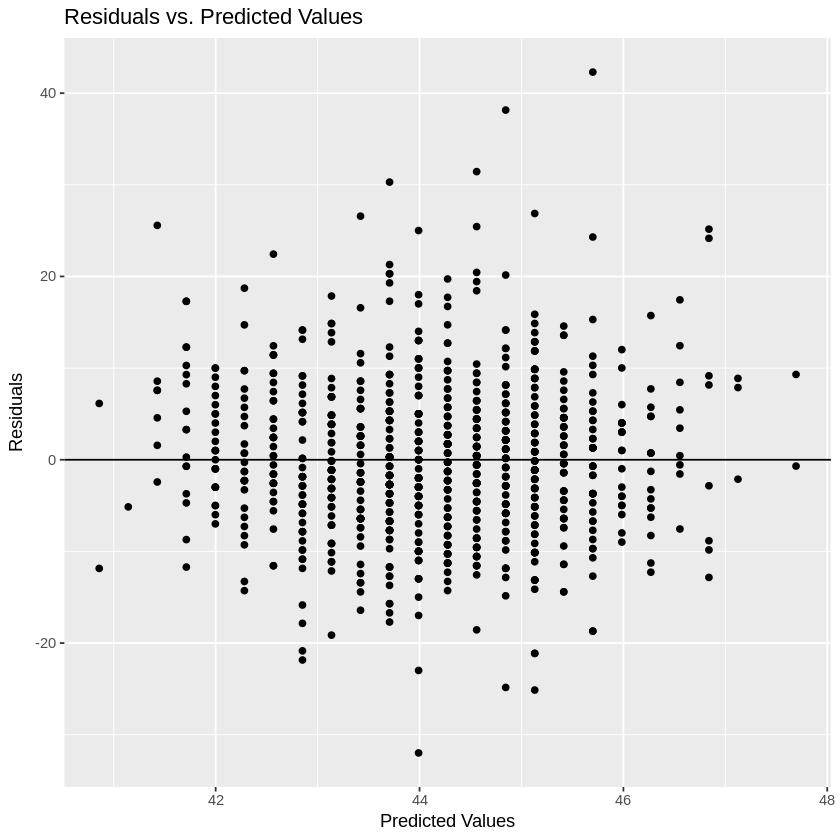

In [53]:
model1 %>%
  fortify(model1$model) %>%
  ggplot(aes(x = .fitted,
             y = .resid)) +
  geom_point()+
  geom_hline(yintercept = 0) +
  labs( x = "Predicted Values",
        y = "Residuals",
        title = "Residuals vs. Predicted Values")

Warning message in model.matrix.default(object, data = structure(list(Str_Acc = c(44, :
“the response appeared on the right-hand side and was dropped”
Warning message in model.matrix.default(object, data = structure(list(Str_Acc = c(44, :
“problem with term 6 in model.matrix: no columns are assigned”


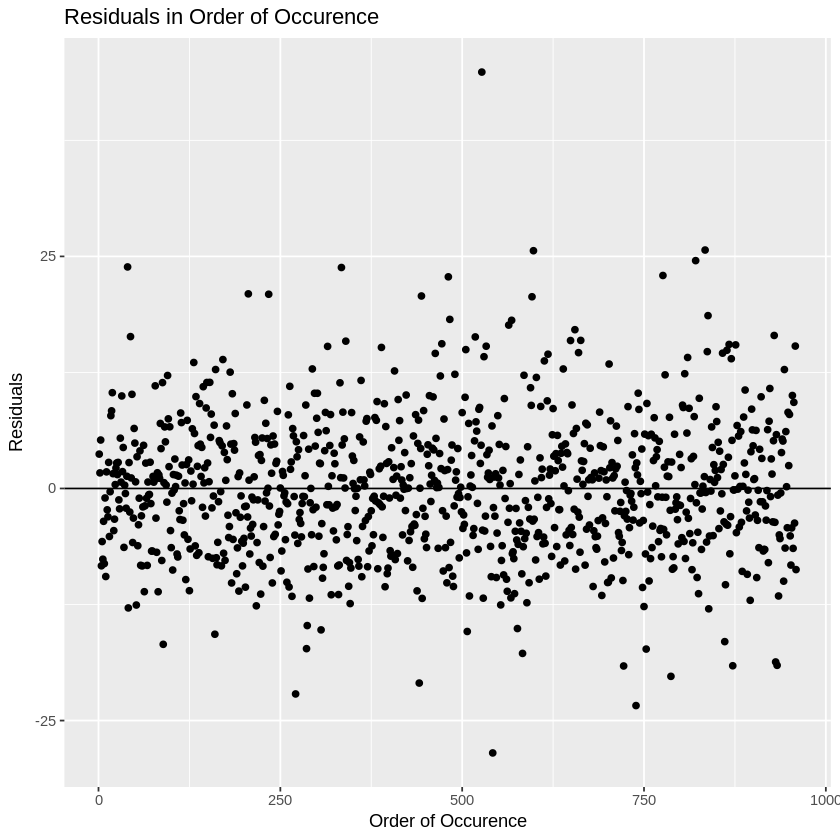

In [54]:
model5 %>%
  fortify(model5$model) %>%
  mutate(row = row_number()) %>%
  ggplot(aes(x = row,
             y = .resid)) +
  geom_point() +
  geom_hline(yintercept = 0) +
  labs(x = "Order of Occurence",
       y = "Residuals",
       title = "Residuals in Order of Occurence")

Warning message in model.matrix.default(object, data = structure(list(Str_Acc = c(44, :
“the response appeared on the right-hand side and was dropped”
Warning message in model.matrix.default(object, data = structure(list(Str_Acc = c(44, :
“problem with term 6 in model.matrix: no columns are assigned”
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


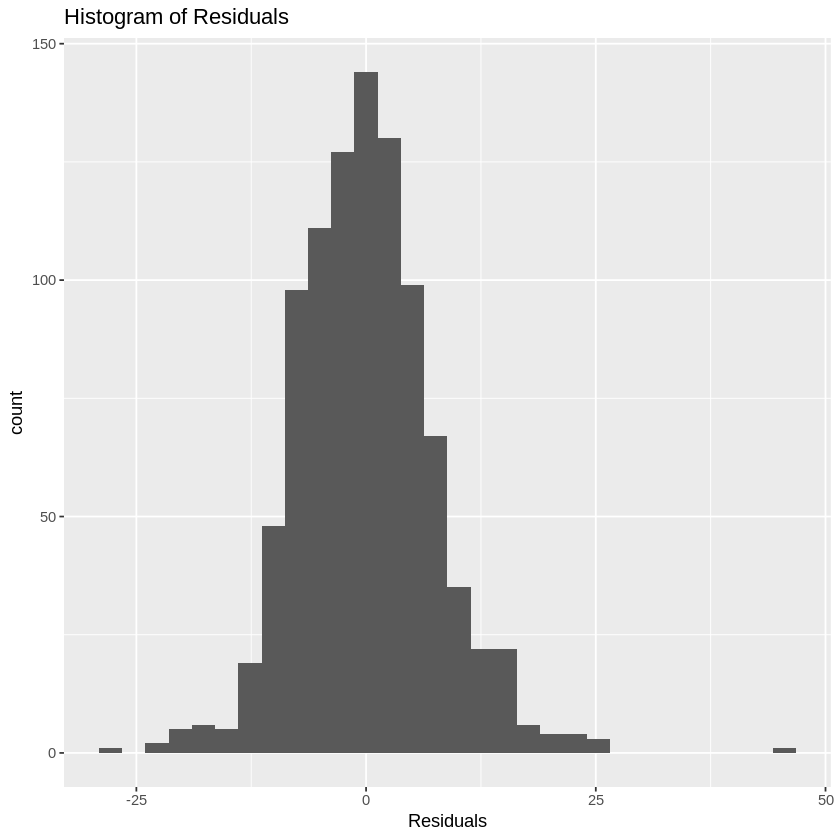

In [55]:
model5 %>%
  fortify(model5$model) %>%
  ggplot(aes(x = .resid)) +
  geom_histogram() +
  labs(x = "Residuals",
       title = "Histogram of Residuals")

In [56]:
install.packages('stargazer')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [58]:
library(stargazer)

# Example: Compare 5 models side by side
stargazer(model1, model2, model3, model4, model5,
          type = "text",         # Use "html" or "latex" for export
          title = "Regression Results",
          column.labels = c("Model 1", "Model 2", "Model 3", "Model 4", "Model 5"),
          dep.var.labels = "Outcome Variable",
          omit.stat = c("f", "ser"),  # Optional: omit certain statistics
          no.space = TRUE)


Regression Results
                            Dependent variable:              
               ----------------------------------------------
                              Outcome Variable               
                Model 1  Model 2  Model 3  Model 4   Model 5 
                  (1)      (2)      (3)      (4)       (5)   
-------------------------------------------------------------
Reach          0.285***  0.294*** 0.320*** 0.301*** 0.239*** 
                (0.066)  (0.066)  (0.062)  (0.061)   (0.059) 
StanceOrthodox            6.489    7.195    7.274            
                         (8.325)  (7.906)  (7.739)           
StanceSouthpaw            7.155    8.109    8.176            
                         (8.341)  (7.921)  (7.753)           
StanceSwitch              9.741    9.496    9.247            
                         (8.426)  (8.001)  (7.832)           
SLpM                              2.171*** 2.413*** 2.538*** 
                                  (0.212)  (0.211)